In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
#Treat outliers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#Treat numerical values
from sklearn.preprocessing import OneHotEncoder

#Option for displaying rows, columns in notebook
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('Healthcare_dataset.csv')

In [ ]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [ ]:
df.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                            object
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                object
Gluco_Record_During_Rx                                                object
Dexa_Freq_During_Rx                                                    int64

In [ ]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [ ]:
df.shape

(3424, 69)

In [ ]:
pd.DataFrame(df.dtypes, columns=['Type']).T

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Type,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64


**Calculate percentage of Persistent and Non-Persistent in the df**

In [ ]:
#Get total number of Persistency and Non-Persistency in Persistency_Flag column
types= df['Persistency_Flag'].value_counts()
print(types)

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


In [ ]:
#Calculate the percentage of Persistency and Non-Persistency
Flag= round(types[0]/df['Persistency_Flag'].count()*100,2)
Non_Flag=round(types[1]/df['Persistency_Flag'].count()*100,2)
#prin the result
print("Persistent : {} %".format(Flag))
print("Non-Persistent : {} %".format(Non_Flag))

Persistent : 62.35 %
Non-Persistent : 37.65 %


# **Checking Missing Value/Null data**

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(tt)

In [ ]:
nullstable = missing_data(df)
nullstable

,Total,Percent,Types
Ptid,0,0.0,object
Persistency_Flag,0,0.0,object
Gender,0,0.0,object
Race,0,0.0,object
Ethnicity,0,0.0,object
Region,0,0.0,object
Age_Bucket,0,0.0,object
Ntm_Speciality,0,0.0,object
Ntm_Specialist_Flag,0,0.0,object
Ntm_Speciality_Bucket,0,0.0,object


Based on the quick checking, there is no missing data in the df!

## **Outlier Analysis**

Because we only have two numerical columns so we will focus only in these two columns

In [ ]:
df.corr(method="pearson", min_periods=1)

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


## **Identifying Outliers with Interquartile Range (IQR)**

The difference between the 75th and 25th percentiles is being used to compute the interquartile range (IQR), which is a measure of statistical dispersion. IQR = Q3 Q1 is the formula for calculating it.

For each of the variables in the df, the lines of code below calculate and report the interquartile range.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Dexa_Freq_During_Rx    3.0
Count_Of_Risks         2.0
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers. It suggests that both these variables have outliers in their data. Let's check different approaches before implementing solutions to deal with outliers in these variable.

# **Identifying Outliers with Skewness and Kurtosis Value**

In [ ]:
#How much is the skewness
print("Dexa_Freq_During_Rx skewness: ",df["Dexa_Freq_During_Rx"].skew())
print("Dexa_Freq_During_Rx Kurtosis: ",df["Dexa_Freq_During_Rx"].kurt())

Dexa_Freq_During_Rx skewness:  6.8087302112992285
Dexa_Freq_During_Rx Kurtosis:  74.75837754795428


In [ ]:
#How much is the skewness
print("Count of risks skewness: ",df["Count_Of_Risks"].skew())
print("Count of risks Kurtosis: ",df["Count_Of_Risks"].kurt())

Count of risks skewness:  0.8797905232898707
Count of risks Kurtosis:  0.9004859968892842


For "Dexa Freq During Rx," the value of skewness and Kurtosis suggest that this variable has a lot of outliers, which takes into account a lot of outliers. Furthermore, the data for "Count of Risk" has a moderate skewness and is moderately kurtosis(Platykurtic), indicating that there are few outliers.

Let's visualize these variable to vertify the outliers in these variable.

## **Identifying Outliers with Boxplot**

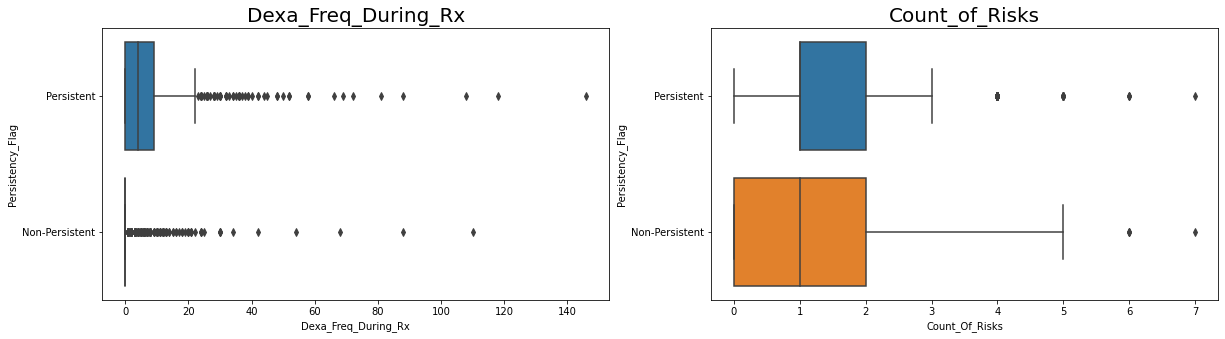

In [ ]:
#Outliers
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x= df['Dexa_Freq_During_Rx'], y = df['Persistency_Flag'])
plt.title('Dexa_Freq_During_Rx', fontsize=20)
plt.subplot(122)
sns.boxplot(x= df['Count_Of_Risks'],  y = df['Persistency_Flag'])
plt.title('Count_of_Risks', fontsize=20)
plt.show()

As we can see on these graphs, it is clearly to conclude that both Dexa_Freq_During_Rx and Count_of_Risks variables have outliers. Therefore, we will implement solutions to deal with this issue

## **Data Transformation to resolve outliers**

My first approach to deal with the skewness and outliers for these variables is using IQR Score. To remove outliers, this approach uses the IQR values calculated before. Anything outside of the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is considered an outlier and should be eliminated.

In this project, I will use RobustScaler() to scale the values of both Dexa_Freq_During_Rx and Count_of_Risks, and remove any data outside of the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) or two whiskers.

In [ ]:
# For Dexa_Freq_During_Rx
scaler = RobustScaler()
df['Dexa_Freq_During_Rx'] = scaler.fit_transform(df['Dexa_Freq_During_Rx'].values.reshape(-1,1))

In [ ]:
# Identify the IQR for Dexa_Freq_During_Rx
''' Detection '''
# IQR
Q1 = np.percentile(df['Dexa_Freq_During_Rx'], 25, 
                   interpolation = 'midpoint') 

Q3 = np.percentile(df['Dexa_Freq_During_Rx'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 

Old Shape:  (3424, 69)


In [ ]:
# Identify the Range of IQR upper and lower bound  
# Upper bound
upper = np.where(df['Dexa_Freq_During_Rx'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Dexa_Freq_During_Rx'] <= (Q1-1.5*IQR)) 

In [ ]:
# Any data out of this upper and lower bound will be removed
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

# Checking New Shape
print("New Shape: ", df.shape)
df = df.reset_index(drop=True)

New Shape:  (2964, 69)


In [ ]:
# For Count of Risks Variable
scaler = RobustScaler()
df['Count_Of_Risks'] = scaler.fit_transform(df['Count_Of_Risks'].values.reshape(-1,1))

In [ ]:
# Identify the IQR for  Count of Risks
''' Detection '''
# IQR
Q1 = np.percentile(df['Count_Of_Risks'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Count_Of_Risks'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 

Old Shape:  (2964, 69)


In [ ]:
# Identify the Range of IQR upper and lower bound  
# Upper bound
upper = np.where(df['Count_Of_Risks'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Count_Of_Risks'] <= (Q1-1.5*IQR)) 

In [ ]:
# Any data out of this upper and lower bound will be removed
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

# Checking New Shape
print("New Shape: ", df.shape)
df = df.reset_index(drop=True)

New Shape:  (2942, 69)


## **Data Wrangling , Transformation and Standardization**

## Assign Value to Y and N, and Persistent and Non-Persistent

**Encode Categorical Value**

In [ ]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of

In [ ]:
#For Persistency flag,Gender replace Persisent and Non-persistent with 0,1 
Persistency= df['Persistency_Flag'].replace(['Persistent','Non-Persistent'],[0,1])
print(Persistency)
Gender = df['Gender'].replace(['Male','Female'],[0,1])
df.insert(1,'Persistency_flag',Persistency)
df.insert(4,'gender',Gender)

In [ ]:
#drop some columns
df = df.drop(columns = ['Ptid', 'Persistency_Flag','Ntm_Speciality','Gender', 'Ntm_Speciality_Bucket'])

In [ ]:
cat_cols = cat_cols.drop(labels =['Ptid', 'Persistency_Flag','Ntm_Speciality','Gender', 'Ntm_Speciality_Bucket'] )

In [ ]:
print(np.shape(df))

(3424, 66)


In [ ]:
df = pd.get_dummies(df, columns = cat_cols)
df

In [ ]:
df.head()

## **Model XGBoost**

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Remove error for "[, ]" or "<" in column names to be able to use model.fit later (otherwise it displays an error):
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]


In [ ]:
# split data into X and y
X = df.drop(['Persistency_flag',], axis=1)
Y = df['Persistency_flag']


In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.00%


# **Skit Learn Ensemble Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=80, max_depth=35)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, n_estimators=80)

In [ ]:
from sklearn.metrics import mean_absolute_error

data_testY = y_test
data_testX = X_test
data_testX['Prediction'] = rf_reg.predict(X_test)

dataset_all = pd.concat([data_testX,data_testY], sort=True)
data_testX.head()

In [ ]:
mean_absolute_error(y_true=y_test,
                   y_pred=data_testX['Prediction'])

0.27524319066147857

In [ ]:
from statsmodels.tools.eval_measures import rmse
error_=rmse(y_test,
                  data_testX['Prediction'])
error_

0.36970688844780636